<a href="https://colab.research.google.com/github/gn0262487838/DL_note/blob/master/model_resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [54]:
from keras.applications.resnet import ResNet50
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout

model = ResNet50(include_top=False, input_shape=(300, 300, 3))
for i in model.layers:
    i.trainable = False

x = GlobalAveragePooling2D()(model.output)
x = Dropout(0.25)(x)
x = Dense(256, activation="relu")(x)
x = Dense(3, activation="softmax")(x)
cnn = Model(inputs=model.input, outputs=x)
cnn.summary()

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           (None, 300, 300, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 306, 306, 3)  0           input_15[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 150, 150, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 150, 150, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [0]:
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [56]:
import glob
import pandas as pd
import numpy as np
traindf = pd.DataFrame(columns=["path", "target"])

for i in glob.glob("drive/Shared drives/Colab/gender_recognition_line/girls/*"):
    s = pd.Series([i, 0], index=["path", "target"])
    traindf = traindf.append(s, ignore_index=True) 
for i in glob.glob("drive/Shared drives/Colab/gender_recognition_line/boys/*"):
    s = pd.Series([i, 1], index=["path", "target"])
    traindf = traindf.append(s, ignore_index=True)
for i in glob.glob("drive/Shared drives/Colab/gender_recognition_line/0/*"):
    s = pd.Series([i, 0], index=["path", "target"])
    traindf = traindf.append(s, ignore_index=True) 
for i in glob.glob("drive/Shared drives/Colab/gender_recognition_line/1/*"):
    s = pd.Series([i, 1], index=["path", "target"])
    traindf = traindf.append(s, ignore_index=True) 
for i in glob.glob("drive/Shared drives/Colab/gender_recognition_line/cat/*"):
    s = pd.Series([i, 2], index=["path", "target"])
    traindf = traindf.append(s, ignore_index=True) 
for i in glob.glob("drive/Shared drives/Colab/gender_recognition_line/dog/*"):
    s = pd.Series([i, 2], index=["path", "target"])
    traindf = traindf.append(s, ignore_index=True)
for i in glob.glob("drive/Shared drives/Colab/gender_recognition_line/moto/*"):
    s = pd.Series([i, 2], index=["path", "target"])
    traindf = traindf.append(s, ignore_index=True) 
for i in glob.glob("drive/Shared drives/Colab/gender_recognition_line/scene/*"):
    s = pd.Series([i, 2], index=["path", "target"])
    traindf = traindf.append(s, ignore_index=True)
for i in glob.glob("drive/Shared drives/Colab/gender_recognition_line/cartoon/*"):
    s = pd.Series([i, 2], index=["path", "target"])
    traindf = traindf.append(s, ignore_index=True) 
print(traindf.shape)
traindf.head()

(6740, 2)


,path,target
0,drive/Shared drives/Colab/gender_recognition_l...,0
1,drive/Shared drives/Colab/gender_recognition_l...,0
2,drive/Shared drives/Colab/gender_recognition_l...,0
3,drive/Shared drives/Colab/gender_recognition_l...,0
4,drive/Shared drives/Colab/gender_recognition_l...,0


In [0]:
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

target_cat = to_categorical(traindf["target"])
x_train, x_test, y_train, y_test = train_test_split(np.array(traindf["path"]), np.array(target_cat), test_size=0.1)

In [64]:
# training
from keras.applications.resnet import preprocess_input
from keras.preprocessing import image

batch_size = 100
for i in range(10):
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    imglist = []
    for j in x_train[idx]:
        img = image.load_img(j, target_size=(300, 300))
        img = preprocess_input(np.array(img))
        imglist.append(img)
    x = np.array(imglist)
    y = y_train[idx]
    result = cnn.train_on_batch(x, y)
    print("start training", i+1)
    print(result)
    
print("done...")

start training 1
[0.22082695, 0.89]
start training 2
[0.2107616, 0.91]
start training 3
[0.2782776, 0.9]
start training 4
[0.2734138, 0.9]
start training 5
[0.27425158, 0.95]
start training 6
[0.20535205, 0.93]
start training 7
[0.27205113, 0.91]
start training 8
[0.1768771, 0.92]
start training 9
[0.30012634, 0.87]


/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:742: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


start training 10
[0.16947816, 0.93]
done...


In [68]:
# evaluate
batch_size = 200
idx = np.random.randint(0, x_test.shape[0], batch_size)
imglist = []
for i in x_test[idx]:
    img = image.load_img(i, target_size=(300, 300))
    img = preprocess_input(np.array(img))
    imglist.append(img)
x = np.array(imglist)
y = y_test[idx]
cnn.evaluate(x, y)

200/200 [==============================] - 3s 17ms/step


[0.219183087348938, 0.92]

預測性別結果為: 男生


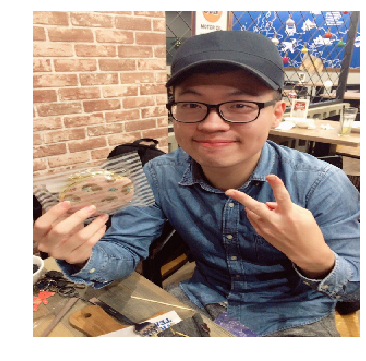

In [69]:
# predict a picture
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications.resnet import preprocess_input
import numpy as np
%matplotlib inline
trans = {0:"女生", 1:"男生",2:"無法辨識男女"}
imglist = []
img_path = "drive/Shared drives/Colab/gender_recognition_line/1519556607132.jpg"
preimg = image.load_img(img_path, target_size=(300, 300))
img = preprocess_input(np.array(preimg))
imglist.append(img)
x = np.array(imglist)
ans = cnn.predict(x).argmax(axis=-1)
print("預測性別結果為:", trans[ans[0]])
plt.figure(figsize=(8,6))
plt.axis("off")
plt.imshow(preimg)

In [0]:
cnn.save(f"drive/Shared drives/Colab/gender_recognition_line/gender_detect_1023_loss_{result[0]:.2f}.h5")